In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
using LinearAlgebra, Plots
import ForwardDiff as FD
using Printf
using JLD2

  Activating environment at `~/OCRL/H1_copy/HW1_S24/Project.toml`


    Updating 

registry at `~/.julia/registries/General`


   Installed ChainRulesCore ─ v1.21.1


    Updating `~/OCRL/H1_copy/HW1_S24/Project.toml`
  [5ae59095] + Colors v0.12.10
  [f6369f11] + ForwardDiff v0.10.36
  [5c1252a2] + GeometryBasics v0.4.10
  [033835bb] + JLD2 v0.4.45
  [283c5d60] + MeshCat v0.15.1
  [6ad125db] + MeshCatMechanisms v0.9.0
  [91a5bcdd] + Plots v1.39.0
  [366cf18f] + RigidBodyDynamics v2.3.2
  [6038ab10] + Rotations v1.7.0
  [90137ffa] + StaticArrays v1.9.2
    Updating `~/OCRL/H1_copy/HW1_S24/Manifest.toml`
  [79e6a3ab] + Adapt v3.7.2
  [bf4720bc] + AssetRegistry v0.1.0
  [13072b0f] + AxisAlgorithms v1.0.1
  [9e28174c] + BinDeps v1.0.2
  [ad839575] + Blink v0.12.5
  [70588ee8] + CSSUtil v0.1.1
  [7057c7e9] + Cassette v0.3.13
  [d360d2e6] + ChainRulesCore v1.21.1
  [9e997f8a] + ChangesOfVariables v0.1.8
  [35d6a980] + ColorSchemes v3.24.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.10
  [5ae59095] + Colors v0.12.10
  [bbf7d656] + CommonSubexpressions v0.3.0
  [34da2185] + Compat v4.12.0
  [187b0558] + ConstructionBase v1.5.4
  [

  [33bec58e] + Xorg_xkeyboard_config_jll v2.39.0+0
  [c5fb5394] + Xorg_xtrans_jll v1.5.0+0
  [3161d3a3] + Zstd_jll v1.5.5+0
  [214eeab7] + fzf_jll v0.43.0+0
  [a4ae2306] + libaom_jll v3.4.0+0
  [0ac62f75] + libass_jll v0.15.1+0
  [f638f0a6] + libfdk_aac_jll v2.0.2+0
  [b53b4c65] + libpng_jll v1.6.40+0
  [f27f6e37] + libvorbis_jll v1.3.7+1
  [1270edf5] + x264_jll v2021.5.5+0
  [dfaa095f] + x265_jll v3.5.0+0
  [d8fb68d0] + xkbcommon_jll v1.4.1+1
  [0dad84c5] + ArgTools
  [56f22d72] + Artifacts
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [8bb1440f] + DelimitedFiles
  [8ba89e20] + Distributed
  [f43a241f] + Downloads


  [7b1f6079] + FileWatching
  [b77e0a4c] + InteractiveUtils
  [b27032c2] + LibCURL
  [76f85450] + LibGit2
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [56ddb016] + Logging
  [d6f4376e] + Markdown
  [a63ad114] + Mmap
  [ca575930] + NetworkOptions
  [44cfe95a] + Pkg
  [de0858da] + Printf
  [3fa0cd96] + REPL
  [9a3f8284] + Random
  [ea8e919c] + SHA
  [9e88b42a] + Serialization
  [1a1011a3] + SharedArrays
  [6462fe0b] + Sockets
  [2f01184e] + SparseArrays
  [10745b16] + Statistics
  [fa267f1f] + TOML
  [a4e569a6] + Tar
  [8dfed614] + Test
  [cf7118a7] + UUIDs
  [4ec0a83e] + Unicode
  [e66e0078] + CompilerSupportLibraries_jll
  [deac9b47] + LibCURL_jll
  [29816b5a] + LibSSH2_jll
  [c8ffd9c3] + MbedTLS_jll
  [14a3606d] + MozillaCACerts_jll
  [05823500] + OpenLibm_jll
  [efcefdf7] + PCRE2_jll
  [83775a58] + Zlib_jll
  [8e850ede] + nghttp2_jll
  [3f19e933] + p7zip_jll


# Q2 (30 pts): Augmented Lagrangian Quadratic Program Solver

## Part (A): QP Solver (10 pts)
Here we are going to use the augmented lagrangian method described [here in a video](https://www.youtube.com/watch?v=0x0JD5uO_ZQ), with [the corresponding pdf here](https://github.com/Optimal-Control-16-745/lecture-notebooks-2022/blob/main/misc/AL_tutorial.pdf) to solve the following problem:

$$\begin{align}
\min_x \quad & \frac{1}{2}x^TQx + q^Tx \\ 
\mbox{s.t.}\quad &  Ax -b = 0 \\ 
&  Gx - h \leq 0 
\end{align}$$
where the cost function is described by $Q \in \mathbb{R}^{n \times n}$, $q \in \mathbb{R}^n$, an equality constraint is described by $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$, and an inequality constraint is described by $G \in \mathbb{R}^{p \times n}$ and $h \in \mathbb{R}^p$.


By introducing a dual variable $\lambda \in \mathbb{R}^m$ for the equality constraint, and $\mu \in \mathbb{R}^p$ for the inequality constraint, we have the following KKT conditions for optimality:

$$\begin{align}
Qx + q + A^T\lambda + G^T \mu &= 0 \quad \quad \text{stationarity}\\ 
Ax-b&= 0 \quad \quad \text{primal feasibility} \\ 
Gx-h&\leq 0 \quad \quad \text{primal feasibility} \\ 
\mu &\geq 0 \quad \quad \text{dual feasibility} \\ 
\mu \circ (Gx - h) &= 0 \quad \quad \text{complementarity}
  \end{align}$$
  where $\circ$ is element-wise multiplication.  

In [9]:
# TODO: read below
# NOTE: DO NOT USE A WHILE LOOP ANYWHERE
"""
The data for the QP is stored in `qp` the following way:
    @load joinpath(@__DIR__, "qp_data.jld2") qp 

which is a NamedTuple, where
    Q, q, A, b, G, h = qp.Q, qp.q, qp.A, qp.b, qp.G, qp.h

contains all of the problem data you will need for the QP.

Your job is to make the following function 
    
    x, λ, μ = solve_qp(qp; verbose = true, max_iters = 100, tol = 1e-8)

You can use (or not use) any of the additional functions:
You can use (or not use) any of the additional functions:
You can use (or not use) any of the additional functions:
You can use (or not use) any of the additional functions:

as long as solve_qp works. 
"""
function cost(qp::NamedTuple, x::Vector)::Real
    0.5*x'*qp.Q*x + dot(qp.q,x)
end
function c_eq(qp::NamedTuple, x::Vector)::Vector
    qp.A*x - qp.b 
end
function h_ineq(qp::NamedTuple, x::Vector)::Vector
    qp.G*x - qp.h
end

function mask_matrix(qp::NamedTuple, x::Vector, μ::Vector, ρ::Real)::Matrix
    # error("not implemented")
    h_const = h_ineq(qp,x)
    m = length(h_const)
    I_p = zeros(m,m)
    for i=1:m
        if (h_const[i] < 0 && μ[i] == 0)
            I_p[i,i] = 0
        else
            I_p[i,i] = ρ
        end
    end
    return I_p
end

function augmented_lagrangian(qp::NamedTuple, x::Vector, λ::Vector, μ::Vector, ρ::Real)::Real
    # error("not implemented")
    c = c_eq(qp,x)
    h = h_ineq(qp,x)
    Lagrangian = cost(qp,x) + λ'*c + μ'*h
    rho_penalty = (ρ/2)*(c'*c)
    I_p = mask_matrix(qp,x,μ,ρ)
    ineq_term = 0.5*(h'*I_p*h)

    aug_Lagrangian = Lagrangian + rho_penalty + ineq_term
    return aug_Lagrangian
end

function logging(qp::NamedTuple, main_iter::Int, AL_gradient::Vector, x::Vector, λ::Vector, μ::Vector, ρ::Real)
    # TODO: stationarity norm
    c = c_eq(qp,x)
    h = h_ineq(qp,x)
    # stationarity = FD.gradient(dx -> cost(qp,dx), x) + FD.jacobian(dx -> c,x)'*λ + FD.jacobian(dx -> h,x)'*μ
    grad_L = FD.gradient(dx -> augmented_lagrangian(qp,dx,λ,μ,ρ),x)
    stationarity_norm = norm(grad_L,Inf)
    @printf("%3d  % 7.2e  % 7.2e  % 7.2e  % 7.2e  % 7.2e  %5.0e\n",
          main_iter, stationarity_norm, norm(AL_gradient), maximum(h_ineq(qp,x)),
          norm(c_eq(qp,x),Inf), abs(dot(μ,h_ineq(qp,x))), ρ)
end
function solve_qp(qp; verbose = true, max_iters = 100, tol = 1e-8)
    x = zeros(length(qp.q))
    λ = zeros(length(qp.b))
    μ = zeros(length(qp.h))
    φ = 10
    ρ = 1.0

    if verbose
        @printf "iter   |∇Lₓ|      |∇ALₓ|     max(h)     |c|        compl     ρ\n"
        @printf "----------------------------------------------------------------\n"
    end
    
    # TODO:
    for main_iter = 1:max_iters 
        if verbose
            logging(qp, main_iter, zeros(1), x, λ, μ, 0.0)
        end
        
        # NOTE: when you do your dual update for μ, you should compute
        # your element-wise maximum with `max.(a,b)`, not `max(a,b)`
        
        # TODO: convergence criteria based on tol 
        # Step 1: Solve min_x Lp(x,λ,μ,ρ) 
        for i = 1:max_iters
            grad_L = FD.gradient(dx -> augmented_lagrangian(qp,dx, λ, μ, ρ),x)
        
            if norm(grad_L) < tol
                break
            end

            H = -FD.hessian(dx -> augmented_lagrangian(qp,dx, λ, μ, ρ),x)
            Δx = H\grad_L
            x += Δx
        end
        
        # Step 2: Update Dual variables
        c = c_eq(qp,x)
        h = h_ineq(qp,x)
        λ += ρ*c
        μ = max.(0,(μ+ρ*h))

        # Step 3: Update the ρ variable 
        ρ = ρ*φ

        #Check convergence
        eq_violation = norm(c,Inf)
        ineq_violation = max.(0, maximum(ρ*h))

        if eq_violation < tol && ineq_violation <= tol
            return x, λ, μ
        end
    end
    error("qp solver did not converge")
end
let 
    # example solving qp 
    @load joinpath(@__DIR__, "qp_data.jld2") qp 
    x, λ, μ = solve_qp(qp; verbose = true, tol = 1e-8)
end

iter   |∇Lₓ|      |∇ALₓ|     max(h)     |c|        compl     ρ
----------------------------------------------------------------


  1   1.59e+01   0.00e+00   4.38e+00   6.49e+00   0.00e+00  0e+00
  2   2.66e-15   0.00e+00   5.51e-01   1.27e+00   4.59e-01  0e+00


  3   4.28e+00   0.00e+00   2.56e-02   3.07e-01   1.05e-02  0e+00
  4   3.49e-01   0.00e+00   6.84e-03   1.35e-02   7.94e-03  0e+00
  5   2.65e-12   0.00e+00   3.64e-05   1.62e-04   1.06e-04  0e+00
  6   1.30e-11   0.00e+00  -5.61e-09   2.05e-08   1.14e-08  0e+00


([-0.326230805713402, 0.24943797997188866, -0.43226766440507025, -1.4172246971241351, -1.3994527400876546, 0.6099582408523686, -0.07312202122159463, 1.3031477521999633, 0.5389034791065502, -0.7225813651685944], [-0.1283519512786051, -2.8376241671761155, -0.832080449930223], [0.0363529426392617, 0.0, 0.0, 1.059444495180323, 0.0])

### QP Solver test

In [10]:
# 10 points 
using Test 
@testset "qp solver" begin 
    @load joinpath(@__DIR__, "qp_data.jld2") qp 
    x, λ, μ = solve_qp(qp; verbose = true, max_iters = 100, tol = 1e-6)
    
    @load joinpath(@__DIR__, "qp_solutions.jld2") qp_solutions
    @test norm(x - qp_solutions.x,Inf)<1e-3;
    @test norm(λ - qp_solutions.λ,Inf)<1e-3;
    @test norm(μ - qp_solutions.μ,Inf)<1e-3;
end

iter   |∇Lₓ|      |∇ALₓ|     max(h)     |c|        compl     ρ
----------------------------------------------------------------
  1   1.59e+01   0.00e+00   4.38e+00   6.49e+00   0.00e+00  0e+00
  2   2.66e-15   0.00e+00   5.51e-01   1.27e+00   4.59e-01  0e+00
  3   4.28e+00   0.00e+00   2.56e-02   3.07e-01   1.05e-02  0e+00
  4   3.49e-01   0.00e+00   6.84e-03   1.35e-02   7.94e-03  0e+00
  5   2.65e-12   0.00e+00   3.64e-05   1.62e-04   1.06e-04  0e+00
Test Summary: | 

Pass  Total
qp solver     |    3      3


Test.DefaultTestSet("qp solver", Any[], 3, false, false)

# Simulating a Falling Brick with QPs
In this question we'll be simulating a brick falling and sliding on ice in 2D. You will show that this problem can be formulated as a QP, which you will solve using an Augmented Lagrangian method.

## The Dynamics
The dynamics of the brick can be written in continuous time as
$$ M \dot{v}  + M g = J^T \mu \\ \text{ where } M = mI_{2\times 2}, \; g = \begin{bmatrix} 0 \\ 9.81 \end{bmatrix},\; J = \begin{bmatrix} 0 & 1 \end{bmatrix} $$
and $\mu \in \mathbb{R}$ is the normal force. The velocity $v \in \mathbb{R}^2$ and position $q \in \mathbb{R}^2$ are composed of the horizontal and vertical components.

We can discretize the dynamics with backward Euler:
$$ \begin{bmatrix} v_{k+1} \\ q_{k+1} \end{bmatrix} = \begin{bmatrix} v_k \\ q_k \end{bmatrix}
+ \Delta t \cdot \begin{bmatrix} \frac{1}{m} J^T \mu_{k+1} - g \\ v_{k+1} \end{bmatrix}$$

We also have the following contact constraints:
$$ \begin{align}
J q_{k+1} &\geq 0 &&\text{(don't fall through the ice)} \\
\mu_{k+1} &\geq 0 &&\text{(normal forces only push, not pull)} \\
\mu_{k+1} J q_{k+1} &= 0 &&\text{(no force at a distance)}
\end{align} $$

## Part (B): QP formulation for Falling Brick (5 pts)
Show that these discrete-time dynamics are equivalent to the following QP by writing down the KKT conditions.

$$ \begin{align}
    &\text{minimize}_{v_{k+1}} && \frac{1}{2} v_{k+1}^T M v_{k+1} + [M (\Delta t \cdot g - v_k)]^Tv_{k+1} \\
    &\text{subject to} && -J(q_k + \Delta t \cdot v_{k+1}) \leq 0 \\
\end{align} $$

**TASK**: Write down the KKT conditions for the optimization problem above, and show that it's equivalent to the dynamics problem stated previously. Use LaTeX markdown.

1. **Stationarity condition**:
$$
\\ \nabla_{V_{k+1}} L=M v_{k+1} + M( \Delta t \cdot g-v_{k})-\mu(J \cdot \Delta t)^{\top}
$$

2. **Primal feasability**:
$$
-Jq_k - J\Delta t \cdot v_{k+1} \leq 0 \\
$$

3. **Dual feasability**: 
$$
\mu \geq 0 \\
$$

4. **Complimentarity**:
$$
\mu\odot J(q_k + \Delta t \cdot v_{k+1}) = 0 \\
$$

## Part (C): Brick Simulation (5 pts)

In [13]:
function brick_simulation_qp(q, v; mass = 1.0, Δt = 0.01)
    
    # TODO: fill in the QP problem data for a simulation step 
    # fill in Q, q, G, h, but leave A, b the same 
    # this is because there are no equality constraints in this qp 
    g = [0; 9.81]
    Mass_matrix = [1.0 0.0; 0.0 1.0]
    qp = (
        # Q = zeros(2,2), 
        # q = zeros(2),
        Q = Mass_matrix,
        q = Mass_matrix*(Δt*g-v),
        A = zeros(0,2), # don't edit this
        b = zeros(0),   # don't edit this 
        # G = zeros(1,2),
        G = -[0 1]*Δt,
        h = [0 1]*q
        )
    
    return qp 
end

brick_simulation_qp (generic function with 1 method)

In [14]:
@testset "brick qp" begin 
    
    q = [1,3.0]
    v = [2,-3.0]
    
    qp = brick_simulation_qp(q,v)
    
    # check all the types to make sure they're right
    qp.Q::Matrix{Float64}
    qp.q::Vector{Float64}
    qp.A::Matrix{Float64}
    qp.b::Vector{Float64}
    qp.G::Matrix{Float64}
    qp.h::Vector{Float64}
    
    @test size(qp.Q) == (2,2)
    @test size(qp.q) == (2,)
    @test size(qp.A) == (0,2)
    @test size(qp.b) == (0,)
    @test size(qp.G) == (1,2)
    @test size(qp.h) == (1,)
    
    @test abs(tr(qp.Q) - 2) < 1e-10
    @test norm(qp.q - [-2.0, 3.0981]) < 1e-10 
    @test norm(qp.G - [0 -.01]) < 1e-10 
    @test abs(qp.h[1] -3) < 1e-10
    
end

Test Summary: | Pass  Total
brick qp      |   10     10


Test.DefaultTestSet("brick qp", Any[], 10, false, false)

#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:29 =# @test(abs(maximum(ys) - 2) < 0.1) = Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:30 =# @test(minimum(ys) > -0.01) = Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:31 =# @test(abs(xs[end] - 3) < 0.01) = Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:34 =# @test(maximum(xdot) < 1.0001) = 

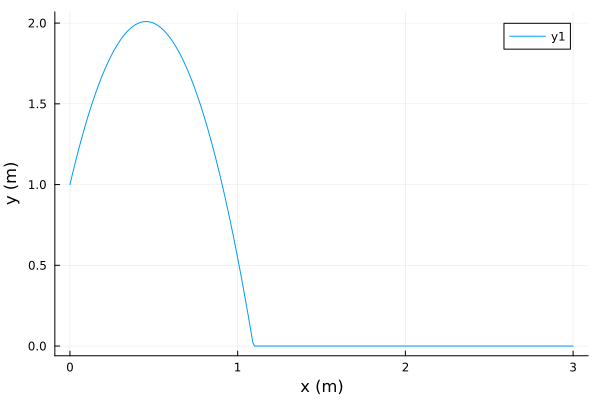

Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:35 =# @test(minimum(xdot) > 0.9999) = Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:36 =# @test(ys[110] > 0.01) = Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:37 =# @test(abs(ys[111]) < 0.01) = Test Passed
#= /home/rsharde/OCRL/H1_copy/HW1_S24/Q3.ipynb:38 =# @test(abs(ys[112]) < 0.01) = Test Passed


┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8701
└ @ MeshCat /home/rsharde/.julia/packages/MeshCat/vWPbP/src/visualizer.jl:73


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("brick" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x72, 0x69, 0x63, 0x6b], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), Set{Any}(), ip"127.0.0.1", 8701))

In [16]:
include(joinpath(@__DIR__, "animate_brick.jl"))
let 
    
    dt = 0.01 
    T = 3.0 
    
    t_vec = 0:dt:T
    N = length(t_vec)
    
    qs = [zeros(2) for i = 1:N]
    vs = [zeros(2) for i = 1:N]
    
    qs[1] = [0, 1.0]
    vs[1] = [1, 4.5]
    
    # TODO: simulate the brick by forming and solving a qp 
    # at each timestep. Your QP should solve for vs[k+1], and
    # you should use this to update qs[k+1]

    for k=1:(N-1)
        qp = brick_simulation_qp(qs[k], vs[k])
        vs[k+1],x,y=solve_qp(qp;verbose = false)
        qs[k+1] = qs[k]+vs[k+1]*dt
    end

    xs = [q[1] for q in qs]
    ys = [q[2] for q in qs]
    
    @show @test abs(maximum(ys)-2)<1e-1
    @show @test minimum(ys) > -1e-2
    @show @test abs(xs[end] - 3) < 1e-2
    
    xdot = diff(xs)/dt
    @show @test maximum(xdot) < 1.0001
    @show @test minimum(xdot) > 0.9999
    @show @test ys[110] > 1e-2
    @show @test abs(ys[111]) < 1e-2
    @show @test abs(ys[112]) < 1e-2
    
    display(plot(xs, ys, ylabel = "y (m)", xlabel = "x (m)"))
    
    animate_brick(qs)
    
    
    
end

# Part D (5 pts): Solve a QP

Use your QP solver to solve the following optimization problem:


$$
\begin{align} 
\min_{y\in\mathbb{R}^2,a\in\mathbb{R},b\in\mathbb{R}} \quad & \frac{1}{2}y^T \begin{bmatrix} 1 & .3 \\ .3 & 1 \end{bmatrix} y + a^2 + 2b^2  + \begin{bmatrix} -2 & 3.4 \end{bmatrix} y + 2a + 4b \\ 
\text{st} \quad & a + b = 1 \\ 
& \begin{bmatrix}-1 & 2.3 \end{bmatrix} y + a - 2b =3 \\
& -0.5 \leq y \leq 1 \\ 
& -1 \leq a \leq 1 \\ 
& -1 \leq b \leq 1
\end{align}
$$

You should be able to put this into our standard QP form that we used above, and solve.

In [29]:
@testset "part D" begin
    Q = [1 0.3 0 0; 0.3 1 0 0; 0 0 0 0; 0 0 0 0]

    q = [-2; 3.4; 2; 4]

    A = [0 0 1 1; -1 2.3 1 -2]
    b = [1; 3]
    
    G = [1 0 0 0; 0 1 0 0; -1 0 0 0; 0 -1 0 0; 0 0 1 0; 0 0 0 1; 0 0 -1 0; 0 0 0 -1]
    h = [1; 1; 0.5; 0.5; 1; 1; 1; 1]
    
    x, λ, μ = solve_qp((Q = Q, q = q, A = A, b = b, G = G, h = h); verbose = true, max_iters = 100, tol = 1e-8)

    # Assert that the solution satisfies the expected conditions
    @test norm(x[1:2] - [-0.080823; 0.834424]) < 1e-3 
    @test abs(x[3] - 1) < 1e-3 
    @test abs(x[4]) < 1e-3 
end


iter   |∇Lₓ|      |∇ALₓ|     max(h)     |c|        compl     ρ
----------------------------------------------------------------
  1   4.00e+00   0.00e+00  -5.00e-01   3.00e+00   0.00e+00  0e+00
  2   7.55e-15   0.00e+00   2.26e+00   2.45e+00   7.74e+00  0e+00
  3   2.75e+00   0.00e+00   6.51e-01   4.13e-01   4.94e+00  0e+00
  4   3.23e+01   0.00e+00   3.19e-01   3.30e-01   1.25e+01  0e+00
  5   3.85e-13   0.00e+00  -3.16e-02   3.18e-02   2.39e-01  0e+00
  6   8.17e-12   0.00e+00  -5.64e-06   3.76e-06   4.22e-05  0e+00
Test Summary: | Pass  Total
part D        |    3      3


Test.DefaultTestSet("part D", Any[], 3, false, false)

## Part E (5 pts): One sentence short answer

1. For our Augmented Lagrangian solver, if our initial guess for $x$ is feasible (meaning it satisfies the constraints), will it stay feasible through each iteration? 

Yes, it will because of the penalty term in the Augmented Lagrangian method.

2. Does the Augmented Lagrangian function for this problem always have continuous first derivatives?

Yes, because it comprises differentiable functions so usually it will have the continuous first derivatives.

3. Is the QP in part D always convex?

No, it is not always convex as that depends on the objective function and the constraints for each problem.